# NNIA Assignment 7

**DEADLINE: 04. 01. 2022 08:00 CET**
Submission more than 10 minutes past the deadline will **not** be graded!

- Benedict Schneider 7009917 (BESC0005): 6 hrs 
- Iris Ferazzo 7028674 (IRFE001): 6 hrs
- Lucas Fonseca Lage 7024877 (LUFO00001): 6 hrs
# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2 or 3**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any **data or cache files** (e.g. `__pycache__`, the dataset PyTorch downloads, etc.). 
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.
___

## Notations (update: inner product at the last line)

- ${A \in \mathbb{R}^{m \times n}}$: capital letter for a matrix. ${m}$ refers to the number of rows and ${n}$ refers to the number of columns.
- ${\textbf{x} \in \mathbb{R}^{n \times 1}}$: bold lowercase for a vector
- ${a \in \mathbb{R}}$: lowercase for a scalar
- ${\textbf{1}}$: bold one denotes a vector of ones, e.g., ${a \cdot \textbf{1} = a \textbf{1} = [a \cdot 1,~a \cdot 1]^{T} = \begin{bmatrix}a\\a\end{bmatrix} }$.\
Superscipt ${T}$ means "transpose": swap rows and columns.
- Symbol ${:=}$ means, "(left-hand side) is defined as (right-hand side)".
- ${f(w;x, y)}$ means that we see it as a function of ${w}$, while ${x}$ and ${y}$ are given (and fixed). Variable ${w}$ can be a trainable parameter in a neural network model, while ${x}$ is an input data and ${y}$ is the ground truth solution for the data point ${x}$. It means that we are going to update ${w}$ during back-propagation, while both ${x}$ and ${y}$ are given (and fixed) data.
- Symbol ${\rightarrow}$ means that the right-hand side of ${\rightarrow}$ is computed by some operations given the left-hand side.
- Symbol ${\leftrightarrow}$ means an expression on the right-hand side of ${\leftrightarrow}$ is equivalent to the left-hand side (see below).
- Symbol ${ \circ }$ means a composition of functions: A function on the right-hand side of ${\circ}$ serves as an input argument to a function on the left-hand side. So, it holds that \begin{align*} g \circ f(x) ~\leftrightarrow~ g(f(x)). \end{align*}
- [Gradient](https://en.wikipedia.org/wiki/Gradient) is generalisation of derivative for a function in higher dimension (many parameters). For example, a function \begin{align*} f(x_{1}, x_{2}, ..., x_{n}) \end{align*} may have its gradient \begin{align*} \nabla f(x_{1}, x_{2}, ..., x_{n}) = \left[~\frac{\partial}{\partial x_{1}} f, \frac{\partial}{\partial x_{2}} f, ..., \frac{\partial}{\partial x_{n}} f \right]^{T}. \end{align*} Each element in a gradient vector is a [partial derivative](https://en.wikipedia.org/wiki/Partial_derivative).

## Definitions and Properties
- ${\ell_{2}}$-norm: ${ {\lVert{\textbf{x}}\rVert}_{2} := \sqrt{  \sum_{i = 1}^{n} \lvert{ x_{i} }^{2} }\rvert = \sqrt{ x_{1}^{2} + ..... + x_{n}^{2} } }$
- squared ${\ell_{2}}$-norm: ${ \lVert{\textbf{x}}\rVert_{2}^{2} = x_{1}^{2} + ... + x_{n}^{2} }$
- inner product: ${\textbf{x}^{T} \textbf{x} = \langle\textbf{x},\textbf{x}\rangle} = x_{1}^{2} + x_{2}^{2} + ... + x_{n-1}^{2} + x_{n}^{2} = \lVert{\textbf{x}}\rVert_{2}^{2}$\
The above is for a vector ${\textbf{x}}$.
___

## 1. Getting Started with PyTorch in Google Collab (with Free GPU)

PyTorch: A Deep Learning Framework
- It shares many commands with Numpy.
- It supports arbitrary-dimensional tensor in GPU.
- It supports automatic differentiation for common neural-network functions.
- PyTorch was initially developed by Facebook (now Meta) and Uber.

Google Colab: A Research / Education tool for Machine Learning
- It is an online Jupyter notebook with free GPU support (for a limited time <= 12 hours consecutively).

In Google Colab, PyTorch is already installed, along side with other many commonly used Python packages for machine learning.
So, you don't need to set up your neural-network and machine learning environment at your personal computer for educational purposes: Just use Google Colab via your browser.

References

https://www.marktechpost.com/2021/01/09/getting-started-with-pytorch-in-google-collab-with-free-gpu/
___

### 1.1 Let's run this Jupyter notebook (.ipynb) in Google Colab
- Upload this Jupyter notebook file in your private Google Drive.
- Double-click to run this Jupyter notebook in Google Drive.
- Once opened, you will see *connect* at the top-right.
  Click *connect to hosted runtime*; this will launch your Jupyter notebook file at a Google server.
- Browse the tab: Runtime >> Change runtime type (click it). Choose GPU as *hardware accellerator*.
- Run the code snippet below to ensure that you have access to a GPU at Google server.
- Carefully read the example code below to check how you can access matrix elements.

In [ ]:
import torch

# Let's check the connected GPU.

print('%s #-of devices: %d, CUDA available: %s' 
      %(torch.cuda.get_device_name(0), 
        torch.cuda.device_count(),
        torch.cuda.is_available()))
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device", end = '\n\n')

# How do we assign matrices and vectors (tensors) in GPU or in CPU memory?

dim1 = 3; dim2 = 2

CUDA0 = torch.device('cuda:0')
A = torch.rand(dim1, dim2, device = CUDA0)  # a tensor at GPU
B = torch.rand(dim1, dim2, device = CUDA0)
C = A + B                                   # The operation is done at GPU.
D = C.cpu()                                 # Bring the result C to CPU memory.
print(C - D.to(CUDA0), end = '\n\n')        # PyTorch.Tensor.to(GPU)

I4 = torch.eye(3) * 4                       # 4 I: You will need this later.
print(I4)

I4[0, 1] = 2                                # How to access elements
I4[:, 2] = 1                                # Slicing
print('\n', I4)

Tesla T4 #-of devices: 1, CUDA available: True
Using cuda device

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]], device='cuda:0')

tensor([[4., 0., 0.],
        [0., 4., 0.],
        [0., 0., 4.]])

 tensor([[4., 2., 1.],
        [0., 4., 1.],
        [0., 0., 1.]])


Now you are prepared to start with the remaining exercises.
___

## 2. ${L_{2}}$ Regularisation

In this exercise, we will be learning the effect of 
${L_{2}}$ regularisation with the simplest possible
neural network model; namely, one hidden layer even
without a nonlinear activation function, minimising
mean squared error as loss function.
<br>

See differences between (1) and (2).
They only differ by an ${L_{2}}$-regularisation
term: ${{\lVert \textbf{w} \rVert}_{2}^{2}}$.
<br><br>

\begin{align}
\ell \left( \textbf{w}; X, \textbf{y} \right) &:= \frac{1}{n} {{\lVert \hat{\textbf{y}} - \textbf{y} \rVert}_{2}^{2},} && (1)\\
L \left( \textbf{w}; X, \textbf{y} \right) &:= \frac{1}{n} {{\lVert \hat{\textbf{y}} - \textbf{y} \rVert}_{2}^{2} 
+ \lambda {\lVert \textbf{w} \rVert}_{2}^{2}, } && (2)
\end{align}
with
\begin{align}
\hat{\textbf{y}} = X \textbf{w}. &&(3)
\end{align}
<br>

Given an input feature matrix ${X \in \mathbb{R}^{n \times d}}$ and its ground truth solution ${\textbf{y} \in \mathbb{R}^{n \times 1}}$, our goal is to to find the best parameters ${\textbf{w} \in \mathbb{R}^{d \times 1}}$. Here, ${n}$ refers to the number of training examples, and ${d}$ refers to the dimension of the input features. So the matrix-vector multiplication results in

\begin{align}
\textbf{y}, \hat{\textbf{y}} \in \mathbb{R}^{n \times 1}. && \left( \mathbb{R}^{n \times d} \times \mathbb{R}^{d \times 1} \right)
\end{align}
<br>

In machine learning, (1) is called *linear regression* due to the fact that the prediction relies only on a linear operation (3). Adding ${L_{2}}$-regularisation term as in (2) on top of this is called *ridge regression*. Such ${L_{2}}$ regularisation is not limited to linear regression model; so we will learn what they do with this simple predictor ${\hat{\textbf{y}} = X \textbf{w}}$, such that you will be able to confidently use this technique also in neural networks in future.
___

### 2.1 How does the linear operation look like? (+0.5 pts)

Consider the case where ${X \in \mathbb{R}^{n \times 1}}$ (remind that vector is a special case of matrix, so please don't get alarmed by capital ${X}$). It means that we have ${n}$ number of data points with only one feature dimension (d = 1). For example, your input data ${\textbf{x} \in \mathbb{R}^{n \times 1}}$ can be sampling time (sec) of an acoustic signal ${\textbf{y} \in \mathbb{R}^{n \times 1}}$.
<br>

- Explicitly write down elements in vector

\begin{align}
\hat{\textbf{y}} = X \textbf{w}
\end{align}

for this particular case: ${d = 1}$.
You can use ${...}$ to simplify elements in the middle.
<br>

Your input data looks like
\begin{align}
\textbf{X} = \begin{bmatrix}
x_{1}\\
x_{2}\\
...\\
x_{n-1}\\
x_{n}
\end{bmatrix}
\end{align}
<br>

Hint. Your weight (trainable parameter) vector reduces to a scalar 
${ \textbf{w} = [w] \in \mathbb{R} }$ because ${d = 1}$.

___
### 2.1 <font color="green">Done</font>

\begin{align}
\hat{\textbf{y}} = X \textbf{w}
\end{align}

Since ${d = 1}$, the vector ${ \textbf{w}}$ becomes one scalar ${w}$

\begin{align}
\textbf{X} = \begin{bmatrix}
x_{1} * w\\
x_{2} * w\\
...\\
x_{n-1} * w\\
x_{n} * w
\end{bmatrix}
\end{align}
<br>

### 2.2 Let us improve the model capacity. (+0.5 pts)

If we consider
\begin{align}
f(x) := w_{0} \cdot x + 1 \cdot w_{1},
\end{align}

one calls ${w_{0}}$ slope and ${w_{1}}$ bias.

For ${d = 1}$ case in 2.1, we do have the slope (for our input data ${\textbf{x}}$) but we are missing the bias. 
<br>

- Explicitly write down elements in matrix ${X \in \mathbb{R}^{n \times 2}}$ where we want to introduce such a missing bias term in our model ${(d = 2)}$. You can use ${...}$ to simplify elements in the middle from 2.1 to 2.4. 

Hint. Think about how ${\textbf{w} \in \mathbb{R}^{2 \times 1}}$ looks like and what should happen with the linear operation ${X \textbf{w}}$. You also can go back and consult section Notations above.

___
### 2.2 <font color="green">Done</font>
\begin{align}
\textbf{X} = \begin{bmatrix}
x_{1} & 1\\
x_{2} & 1\\
...\\
x_{n-1,1} & 1\\
x_{n,1} & 1
\end{bmatrix} * \begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix} → \begin{bmatrix}
x_{1,1}*w_{1} + w_{2}\\
x_{2,1}*w_{1} + w_{2}\\
...\\
x_{n-1,1}*w_{1} + w_{2}\\
x_{n,1}*w_{1} +  w_{2}
\end{bmatrix}
\end{align}
<br>

Is this a modeling problem or is this a solution to the equation? I could just add 1 to the second column and that would be it to model the problem, but it seems to go against what the formula says.

### 2.3 Improving the model capacity further. (+0.5 pts)
Assume that you got a hunch that your ground truth data ${\textbf{y} \in \mathbb{R}^{n}}$ is going to be well-described by a quadratic function:
<br>

\begin{align}
g(x) := w_{0} \cdot x^{2} + w_{1} \cdot x + w_{2}.
\end{align}

Explicitly write down elements in matrix ${X \in \mathbb{R}^{n \times 3}}$ to model your problem as in ${g(x)}$.

Hint. "The amplitude g(x) at time x is described as...".

___
### 2.3 <font color="green"> Done</font>

\begin{align}
\textbf{X} = \begin{bmatrix}
x_{1,1}^{2} & x_{1,2} & 1\\
x_{2,1}^{2} & x_{2,2} & 1\\
        ... \\
x_{n-1,1}^{2} & x_{n-1,2} & 1\\
x_{n,1}^{2} & x_{n,2} & 1
\end{bmatrix} * \begin{bmatrix}
w_{0} \\
w_{1} \\
w_{2}
\end{bmatrix} → \begin{bmatrix}
x_{1,1}^{2}*w_{0} + x_{1,2}*w_{1} + w_{2}\\
x_{2,1}^{2}*w_{0} + x_{2,2}*w_{1} + w_{2}\\
...\\
x_{n-1,1}^{2}*w_{0} + x_{n-1,2} * w_{1} + w_{2}\\
x_{n,1}^{2}*w_{0} + x_{n,2} * w_{1} +  w_{2}
\end{bmatrix}
\end{align}
<br>

### 2.4 Generalisation to an arbitrary polynomial (+0.5 pts)

In 2.3, our model is a quadratic function (as a predictor). Let us denote the order of this polynomial function with ${p = 2}$ (in 2.3).

Explicitly write down the elements in the feature matrix ${X \in \mathbb{R}^{n \times (p + 1)}}$ for a ${p}$-th order polynomial model (including the bias term). You will need this to commence with the implementation below.

Hint. ${h(x) = w_{0} \cdot x^{p} + w_{1} \cdot x^{p-1} + ... + w_{p} \cdot x^{0}}$.

___
### 2.4 <font color="green">Done</font>

\begin{align}
\textbf{X} = \begin{bmatrix}
x_{1,1}^{p} & x_{1,2}^{p-1} & \dots & x_{1,p+1}^{0}\\
x_{2,1}^{p} & x_{2,2}^{p-1} & \dots & x_{2,p+1}^{0}\\
        \vdots & \vdots & \ddots & \vdots \\
x_{n-1,1}^{p} & x_{n-1,2} & \dots & x_{n-1,p+1}^{0}\\
x_{n,1}^{p} & x_{n,2} & \dots & x_{n,p+1}^{0}
\end{bmatrix} * \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{p-1}\\
w_{p}
\end{bmatrix} → \begin{bmatrix}
x_{1,1}^{p}*w_{0} + x_{1,2}^{p-1}*w_{1} + \dots + x_{1,p}*w_{p}\\
x_{2,1}^{p}*w_{0} + x_{2,2}^{p-1}*w_{1} + \dots + x_{2,p}^{0}*w_{p}\\
...\\
x_{n-1,1}^{p}*w_{0} + x_{n-1,2}^{p-1} * w_{1} + \dots + x_{n-1,p}^{0}*w_{p}\\
x_{n,1}^{p}*w_{0} + x_{n,2}^{p-1} * w_{1} + \dots +  x_{n,p}^{0}*w_{p}
\end{bmatrix}
\end{align}
<br>

### 2.5 Implementing Ridge Regression with PyTorch (+2 pts)

Ridge regression minimises the following loss function:

\begin{align}
L \left( \textbf{w}; X, \textbf{y} \right) := \frac{1}{n} {{\lVert X \textbf{w} - \textbf{y} \rVert}_{2}^{2} + \lambda {\lVert \textbf{w} \rVert}_{2}^{2}. } && (2)
\end{align}
<br>

The globally optimal solution for your training parameter ${\textbf{w}}$ is given as

\begin{align}
\textbf{w} = \left( X^{T} X + \lambda I \right)^{-1} \left(X^{T}\textbf{y} \right). && (4)
\end{align}
<br>

where ${X^{T}}$ is the [transpose](https://en.wikipedia.org/wiki/Transpose) of your feature matrix ${X}$, and ${X^{T} X} \in \mathbb{R}^{d \times d}$ is a matrix-matrix multiplication. The regularisation parameter ${\lambda \geq 0}$ is a scalar that you choose (hyperparameter). Finally, ${I}$ denotes an [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix).

Let us implement ridge regression and study impact of choosing different ${L_{2}}$-regularisation parameter ${\lambda}$. Don't forget that lambda is a non-negative value. We are going to minimise the loss function (2) w.r.t. the trainable parameter ${\textbf{w}}$ by using the analytic solution (4); we do not need gradient iterations in this case because we know the global optimal solution's analytic expression (4) and the problem size is small. 

<br>
Hint: By analytic, we mean that we know the form of the solution but it still requires to solve a system of equations.
<br>

In the following, input vector ${\textbf{y}}$ is an acoustic signal (1D) over time ${\textbf{x}}$.
It looks very noisy. We want to find a good ${\hat{\textbf{y}} = X \textbf{w}}$
with ridge regression in this exercise.
<br>

### Use [torch.transpose()](https://pytorch.org/docs/stable/generated/torch.transpose.html) [torch.matmul()](https://pytorch.org/docs/stable/generated/torch.matmul.html) [torch.linalg.solve()](https://pytorch.org/docs/stable/generated/torch.linalg.solve.html) to compute (4).

- w = torch.linalg.solve(X, y) ${\leftrightarrow}$
  ${\textbf{w} = X^{-1} \textbf{y}}$.
- Implement ridge regression for the data below. We ask you to use the highest polynomial order ${p = 19}$ based on your solution in 2.4, and there must be a bias term; this means that the dimension of your feature matrix is going to be ${X \in \mathbb{R}^{256 \times 20}}$. 
- It is not a mandatory, but try to load matrix and vectors (tensors) at GPU so that linear-algebraic operations also happen at GPU (PyTorch.Tensor); so that you can freely use GPU capability later as you wish with PyTorch.
- Try three different regularisation parameters ${\lambda = \{ 0, 1e^{-3}, 1 \}}$
and store their predictions ${\hat{\textbf{y}} = X \textbf{w}}$ separately for each lambda.
- Plot ${\hat{\textbf{y}} = X \textbf{w}}$ for different lambda in the same figure and compare to the given acoustic signal ${\textbf{y}}$. So, there must be four graphs in the same figure.
What is your observation? Discuss your ideas in detail. Can you relate your observation to overfitting and underfitting?
___


There are 256 number of data sampling points in vector y.



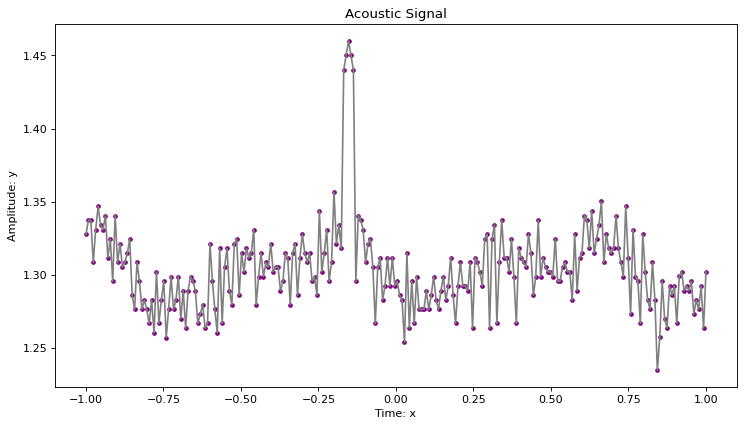

In [ ]:
# GIVEN DATA FOR STUDENTS (just run this section)

import numpy as np
import matplotlib.pyplot as plt

y = np.array([1.32770000000000, 1.33732000000000, 1.33732000000000, 1.30846000000000, 1.33090000000000, 1.34694000000000, 1.33412000000000, 1.33091000000000, 1.34053000000000, 1.31167000000000, 1.32449000000000, 1.29563000000000, 1.34053000000000, 1.30846000000000, 1.32129000000000, 1.30525000000000, 1.30846000000000, 1.31487000000000, 1.32449000000000, 1.28601000000000, 1.27639000000000, 1.30846000000000, 1.29563000000000, 1.27639000000000, 1.28280000000000, 1.27639000000000, 1.26677000000000, 1.28280000000000, 1.26035000000000, 1.30205000000000, 1.26677000000000, 1.28280000000000, 1.29563000000000, 1.25715000000000, 1.27639000000000, 1.29884000000000, 1.27639000000000, 1.28280000000000, 1.29884000000000, 1.26998000000000, 1.28922000000000, 1.26356000000000, 1.28922000000000, 1.29884000000000, 1.29564000000000, 1.28922000000000, 1.26677000000000, 1.27318000000000, 1.27960000000000, 1.26356000000000, 1.26677000000000, 1.32129000000000, 1.29564000000000, 1.27639000000000, 1.26037000000000, 1.31808000000000, 1.26679000000000, 1.30526000000000, 1.31809000000000, 1.28922000000000, 1.27960000000000, 1.32130000000000, 1.32451000000000, 1.28602000000000, 1.31488000000000, 1.30205000000000, 1.31810000000000, 1.31168000000000, 1.31489000000000, 1.33092000000000, 1.27961000000000, 1.29886000000000, 1.31489000000000, 1.29886000000000, 1.30847000000000, 1.30527000000000, 1.32131000000000, 1.30206000000000, 1.30527000000000, 1.30527000000000, 1.28924000000000, 1.29565000000000, 1.31489000000000, 1.31168000000000, 1.27961000000000, 1.31489000000000, 1.32131000000000, 1.28603000000000, 1.31168000000000, 1.32772000000000, 1.31489000000000, 1.30848000000000, 1.31489000000000, 1.29565000000000, 1.29886000000000, 1.28603000000000, 1.34376000000000, 1.30206000000000, 1.31489000000000, 1.33093000000000, 1.29565000000000, 1.30848000000000, 1.35658000000000, 1.32131000000000, 1.33413000000000, 1.31810000000000, 1.44000000000000, 1.45000000000000, 1.46000000000000, 1.45000000000000, 1.44000000000000, 1.29565000000000, 1.34055000000000, 1.33734000000000, 1.33093000000000, 1.30848000000000, 1.32131000000000, 1.32451000000000, 1.30527000000000, 1.26679000000000, 1.30528000000000, 1.31169000000000, 1.28283000000000, 1.29244000000000, 1.31168000000000, 1.29245000000000, 1.31169000000000, 1.29244000000000, 1.29565000000000, 1.28603000000000, 1.28282000000000, 1.25396000000000, 1.31489000000000, 1.26358000000000, 1.29566000000000, 1.26679000000000, 1.29887000000000, 1.27641000000000, 1.27641000000000, 1.27642000000000, 1.28925000000000, 1.27642000000000, 1.28603000000000, 1.29887000000000, 1.28284000000000, 1.27641000000000, 1.28925000000000, 1.29887000000000, 1.28282000000000, 1.29246000000000, 1.31170000000000, 1.28604000000000, 1.26680000000000, 1.29246000000000, 1.30850000000000, 1.29246000000000, 1.29246000000000, 1.28925000000000, 1.30850000000000, 1.26360000000000, 1.31170000000000, 1.30849000000000, 1.30208000000000, 1.29246000000000, 1.32453000000000, 1.32774000000000, 1.26360000000000, 1.32453000000000, 1.33415000000000, 1.26680000000000, 1.30850000000000, 1.33736000000000, 1.31170000000000, 1.31170000000000, 1.30208000000000, 1.32453000000000, 1.29887000000000, 1.26680000000000, 1.31812000000000, 1.31170000000000, 1.30850000000000, 1.30529000000000, 1.32774000000000, 1.31491000000000, 1.28605000000000, 1.29887000000000, 1.33736000000000, 1.29887000000000, 1.31170000000000, 1.30529000000000, 1.30208000000000, 1.30208000000000, 1.29887000000000, 1.32453000000000, 1.29567000000000, 1.29567000000000, 1.30529000000000, 1.30850000000000, 1.30208000000000, 1.30209000000000, 1.28284000000000, 1.32774000000000, 1.28925000000000, 1.31171000000000, 1.31491000000000, 1.34057000000000, 1.33738000000000, 1.31812000000000, 1.34378000000000, 1.31492000000000, 1.32454000000000, 1.33415000000000, 1.35020000000000, 1.30851000000000, 1.32775000000000, 1.31813000000000, 1.31492000000000, 1.31813000000000, 1.34058000000000, 1.31813000000000, 1.30850000000000, 1.29888000000000, 1.34698000000000, 1.31172000000000, 1.27323000000000, 1.33095000000000, 1.29888000000000, 1.29568000000000, 1.26682000000000, 1.32776000000000, 1.30210000000000, 1.28286000000000, 1.27644000000000, 1.30851000000000, 1.28286000000000, 1.23475000000000, 1.25720000000000, 1.29568000000000, 1.27003000000000, 1.26361000000000, 1.29248000000000, 1.28606000000000, 1.29248000000000, 1.26682000000000, 1.29889000000000, 1.30210000000000, 1.28927000000000, 1.29248000000000, 1.28927000000000, 1.29568000000000, 1.27323000000000, 1.28286000000000, 1.27644000000000, 1.29248000000000, 1.26361000000000, 1.30210000000000])
y = torch.from_numpy(y).type(torch.float).to(CUDA0)
n = y.size()[0]
x = torch.linspace(-1, +1, n)

print('\nThere are %d number of data sampling points in vector y.\n' %(len(x)))

plt.figure(figsize=(11, 6), dpi=80)
plt.plot(x.cpu().numpy(), y.cpu().numpy(),    color = 'grey')
plt.scatter(x.cpu().numpy(), y.cpu().numpy(), color = 'purple', s = 10)
plt.title('Acoustic Signal')
plt.xlabel('Time: x')
plt.ylabel('Amplitude: y')
plt.show()

### 2.5 <font color="Green">Done</font>


In [ ]:
# create X feature matrix
def Xmatrix(x):
  '''
  transforms x (tensor) data points representing time to matrix
  '''
  p = 19
  # how to create a matrix in torch:
  # 1) create list of lists. Each list = row of matrix
  X_list=[]
  for elem in x:
    elem=elem.item()
    X_row=[]
    for i in range(p+1):
      entry_in_row=elem**i
      X_row.append(entry_in_row)
    X_list.append(X_row)

  # 2) convert list of lists to numpy array
  X_array=np.array(X_list)
  
  # 3) convert numpy array to torch
  X = torch.tensor(X_array).to(device)
  print('X shape: ',X.shape)
  return X

X = Xmatrix(x)

print(X[:,0])

l_terms = {0, 0.001, 1}
# use X to calculate w
def get_w(X,l_terms):
  weights={}
  p = 19
  
  X_T=torch.transpose(X,0,1).to(device) # don't understand why these dim
  X_I=(torch.eye(p+1)).to(device)
  for l_term in l_terms:
    first_half_w=torch.inverse(torch.matmul(X_T,X) + (l_term*X_I))
    y_doub=y.double()
    second_half_w = torch.matmul(X_T,y_doub)

    w = torch.matmul(first_half_w,second_half_w)
    weights[l_term]=w

  return weights

weights = get_w(X,l_terms)
print(weights.keys())

# use w to calculate L
def get_loss(X,weights,l_terms):
  predictions={}
  for l_term in l_terms:
    w=weights[l_term]
    L = torch.matmul(X,w)
    predictions[l_term]=L

  return predictions

predictions = get_loss(X,weights,l_terms)
#print(predictions[0])

In [ ]:
# Plots

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 12)
# Original
axs[0, 0].plot(x.cpu(), y.cpu())
axs[0, 0].set_title('Original noisy function')
# Lambda = 0
axs[0, 1].plot(x.cpu(), predictions[0].cpu(), 'tab:orange')
axs[0, 1].set_title('Lambda = 0')
# Lambda = 0.001
axs[1, 0].plot(x.cpu(), predictions[0.001].cpu(), 'tab:green')
axs[1, 0].set_title('Lambda = 0.001')
# Lambda = 1
axs[1, 1].plot(x.cpu(), predictions[1].cpu(), 'tab:red')
axs[1, 1].set_title('Lambda = 1')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


Setting lambda to 0 means that there is no penalty term and therefore ridge regression is not performed. 

Since ridge regression is a method used to prevent overfitting, we can exactly see an overfitting effect when lambda equals 0. 

In contrast, increasing lambda leads to a less complex function, i.e. towards underfitting.

___
- Bonus 1: Draw contour lines of ${L_{2}}$-norm and ${L_{1}}$-norm in 2D space: ${\textbf{x} \in \mathbb{R}^{2}}$. One can use [matplotlib.pyplot.contour()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).
- Bonus 2: Have a look into the differences between ${L_{2}}$-norm and ${L_{1}}$-norm's shapes in [2D space](https://miro.medium.com/max/1100/1*_e8BLNA749W_7yxi7hz-DA.gif); contour lines denote the same function value. 
What is the major use case of ${L_{1}}$ regularisation? How can they be useful?
- Bonus 3: In our ridge regression model, we used a polynomial expressions to come up with a feature matrix (or design matrix) could one use some other functions than polynomials? What could be the analogy of such polynomials in the case of neural network models? Can one use cosine or sine functions instead? Justify your answer.

*[reference](https://satishkumarmoparthi.medium.com/why-l1-norm-creates-sparsity-compared-with-l2-norm-3c6fa9c607f4#:~:text=The%20reason%20for%20using%20the,and%20thus%20a%20sparse%20solution.)
___

# 3 Dropout
##3.1 Introduction to Dropout (1 pt)

Read sections 1, 2 and 4 from [an introductory paper to dropout](https://dl.acm.org/doi/pdf/10.5555/2627435.2670313). Describe in detail what dropout is:
- What is the statistical rationale behind it, why we need it (0.25)
- How it is implemented (0.25)
- Importantly what do we have to take care of during inference? (0.5)

PS Did you know that dropout is technically [patented by Google](https://patents.google.com/patent/US9406017B2/en)?

### 3.1 <font color="Green">Done</font>
Dropout is a regularization method to prevent overfitting. It is achieved by temporarily removing nodes and their connections from the network. This process happens randomly, in the most simple case with a fixed dropout rate. The method can also be seen as randomly sampling thinned networks from the original one. For a network with n units, there are $2^n$ possible thinned networks.

As for the implementation, for each training example, a new (thinned) network is sampled and trained. The process can be seen as not training a single (full) network but many different sparser networks (of potentially $2^n$ different ones).

At test time, a single neural network is used, where the units have scaled down weights according to their drop out probability during training. This is an approximate averaging method, since it is not feasible to average the predictions from exponentially many thinned models.

## 3.2 Dropout in Pytorch (4 pts)
Now that we understand how dropout works, let's implement a network in pytorch that utilizes [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html). We will be working with the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset.
Implement the following network:
<br><br>

$L_{64 \rightarrow 10} \circ \text{ReLU} \circ L_{128 \rightarrow 64} \circ \text{ReLU} \circ L_{28\cdot 28\rightarrow 128}$
<br><br>

and apply dropout at rate of $0.5$ to the first two linear layers: ${L_{28\cdot 28\rightarrow 128}}$ and ${L_{128 \rightarrow 64}}$. 
<br><br>

As an optimizer, use Adam with a learning rate of $1e^{-4}$ and use [cross entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as the loss criterion. 
<br><br>

Train your network on the MNIST dataset for 5 epochs with a batch size of 200 and print the accuracy of your model on the test set after each epoch. We will use the default train test split (see the pytorch [MNIST documentation](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html) for more information).
<br><br>

### 3.2 <font color="Green">Done</font>

In [ ]:
import os
import torch
from torch import nn
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import transforms



# Do not change
torch.manual_seed(42)

# load data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=200, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=200, shuffle=False)  

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# your code here
# L64→10∘ReLU∘L128→64∘ReLU∘L28⋅28→128

class MyNetwork(torch.nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.linear1 = torch.nn.Linear(28*28, 128)
        self.linear2 = torch.nn.Linear(128, 64)
        self.linear3 = torch.nn.Linear(64,10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.reshape(-1,784)
        x = self.dropout(self.linear1(x))
        x = self.relu(x)
        x = self.dropout(self.linear2(x))
        x = self.relu(x)
        outputs = self.linear3(x)
        return outputs

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


## Hyperparam
LR_RATE=0.0001
EPOCHS=5

## Running the network


model = MyNetwork()

optimizer = torch.optim.Adam(model.parameters(), lr=LR_RATE)

criterion = torch.nn.CrossEntropyLoss()

for i in range(EPOCHS):
  train_loop(train_loader, model, criterion, optimizer)
  test_loop(test_loader,model,criterion)



loss: 2.309462  [    0/60000]
loss: 2.091170  [20000/60000]
loss: 1.660800  [40000/60000]
Test Error: 
 Accuracy: 60.8%, Avg loss: 1.293957 

loss: 1.405121  [    0/60000]
loss: 1.057791  [20000/60000]
loss: 0.926079  [40000/60000]
Test Error: 
 Accuracy: 74.2%, Avg loss: 0.839008 

loss: 0.890011  [    0/60000]
loss: 0.785873  [20000/60000]
loss: 0.728357  [40000/60000]
Test Error: 
 Accuracy: 78.8%, Avg loss: 0.685594 

loss: 0.692609  [    0/60000]
loss: 0.603793  [20000/60000]
loss: 0.613800  [40000/60000]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.587407 

loss: 0.718657  [    0/60000]
loss: 0.546174  [20000/60000]
loss: 0.529618  [40000/60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.534081 



## 4 Data Augmentation  (1 pts)
Read this [article](https://neptune.ai/blog/data-augmentation-nlp) by Shahul Es and  about data augmentation in natural language processing. For a fuller picture, you can also have a look at [this article](https://amitness.com/2020/05/data-augmentation-for-nlp/) by Amit Chaudhary. Answer the following question:

- Data augmentation in NLP is very task-specific and should be applied carefully. 
Provide an example of a augmentation method \& task pair where data augmentation might harm the model. Justify your answer (2-4 sentences).
	A list of NLP tasks you can find [here](https://natural-language-understanding.fandom.com/wiki/List_of_natural_language_processing_tasks) (you can also give an example with a task not from this list).
- Present your findings in the tutorial for bonus points

#### Two examples:

1. Sentiment analysis & synonym replacement

This seems dangerous, since true synonyms are very rare (if they exist at all), and even close to true synonyms might be loaded with different connotations. Replacing them without supervision might distort the sentiment of a sentence.

2. Random swap/deletion & any syntax related task (e.g. dependency parsing)

This seems completely incompatible, since syntax is very sensitive (restricted) to word order in many languages. Deleting or swapping random words seems very counterintuitive.